<a href="https://colab.research.google.com/github/Omkarphadatare/OIBSIP/blob/main/OIBSIP_TASK5_Sales_Prediction_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing *Libraries*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

Reading the *dataset*

In [ ]:
df=pd.read_csv("Advertising.csv")

Data Analysis (*Exploration*)

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
print("Shape of Dataset is:",df.shape)

Shape of Dataset is: (200, 5)


In [ ]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
df1=df.drop(['Unnamed: 0'],axis=1)

In [ ]:
df1.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
print("Shape after dropping column is:",df1.shape)

Shape after dropping column is: (200, 4)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


*Bivariate* Analysis

In [ ]:
df1.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


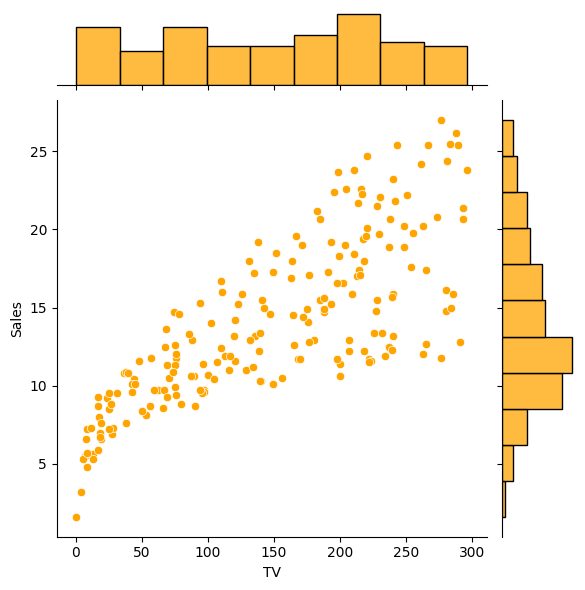

In [ ]:
sns.jointplot(x="TV",y="Sales",data=df1,color="orange")

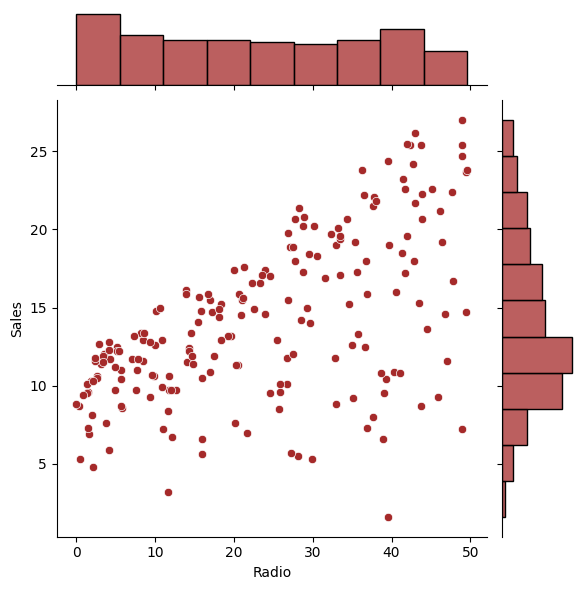

In [ ]:
sns.jointplot(x="Radio",y="Sales",data=df1,color="brown")

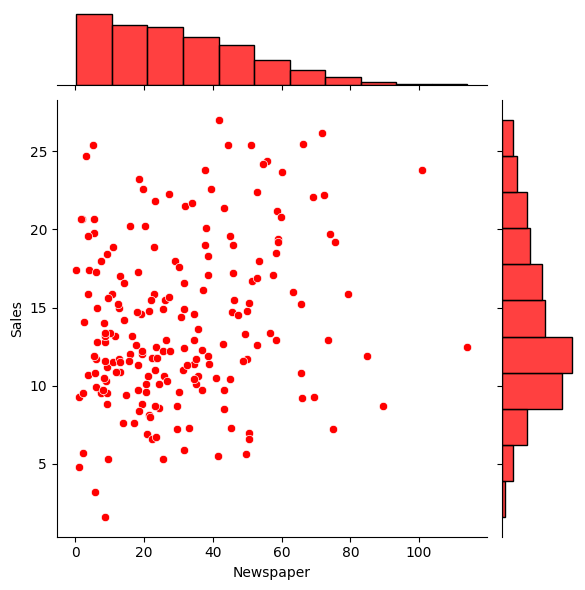

In [ ]:
sns.jointplot(x="Newspaper",y="Sales",data=df1,color="red")

*Multivariate* Analysis

In [ ]:
df1.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


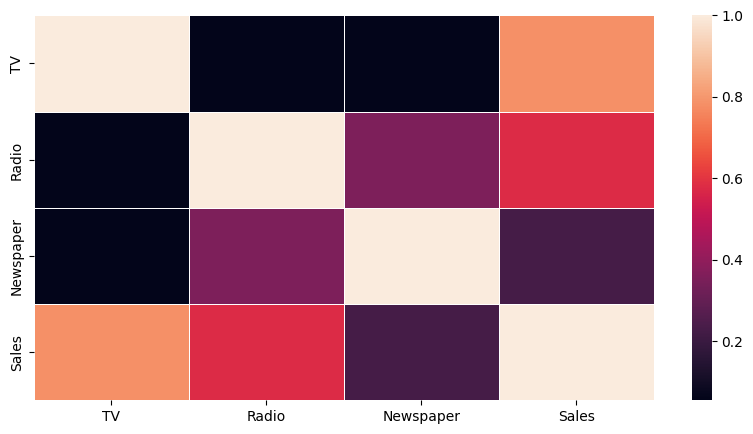

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(),linewidth=".5")
plt.show()

Model Building

In [ ]:
x=df1.drop(columns="Sales")

In [ ]:
y=df1["Sales"]

In [ ]:
x.describe()

,TV,Radio,Newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


In [ ]:
X_scaled= x.apply(zscore)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,1.221245e-16,1.002509,-1.708823,-0.848530,0.031615,0.838195,1.744029
Radio,200.0,-4.529710e-16,1.002509,-1.570868,-0.897321,-0.024579,0.895430,1.778300
Newspaper,200.0,2.220446e-16,1.002509,-1.392646,-0.819550,-0.221137,0.669579,3.841171


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.3,random_state=42)

In [ ]:
print("The Shape of X_train :", X_train.shape)
print("The Shape of X_Test :", X_test.shape)
print("The Shape of Y_Train :", y_train.shape)
print("The Shape of Y_Test :", y_test.shape)

The Shape of X_train : (140, 3)
The Shape of X_Test : (60, 3)
The Shape of Y_Train : (140,)
The Shape of Y_Test : (60,)


In [ ]:
mod=LinearRegression(fit_intercept=True)
mod.fit(X_train,y_train)

LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [ ]:
pred= mod.predict(X_test)
print("Root Mean Square:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

Root Mean Square: 1.9485372043446385


In [ ]:
print("r2 is:",r2_score(y_test, pred))

r2 is: 0.8609466508230368


**Accuracy** of the model in % is *86.09*%

END.